<a href="https://colab.research.google.com/github/SasiPreetam/Persoalised-AI-assistant-/blob/main/Marks_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Mark's Prediction:**

In [ ]:
from google.colab import files
upload=files.upload()

Saving student_info (2).csv to student_info (2).csv


# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/student_info (2).csv")
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [ ]:
#showing first five rows
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [ ]:
#Showing Last five rows
df.tail()
df.shape

(200, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [ ]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


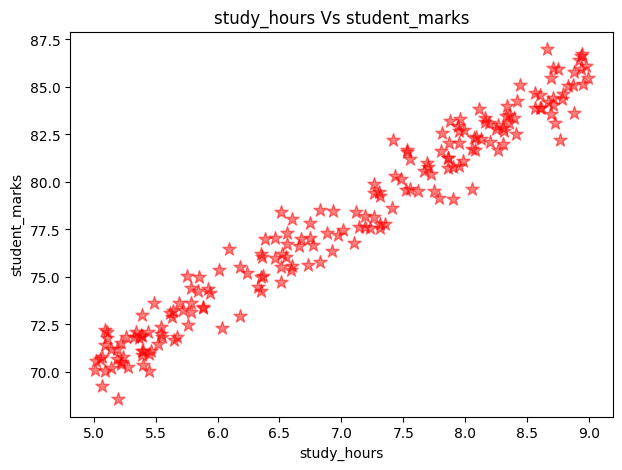

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(x=df.study_hours,y=df.student_marks,color="red",marker="*",s=100,alpha=0.5)
plt.xlabel("study_hours")
plt.ylabel("student_marks")
plt.title("study_hours Vs student_marks")
plt.show()

**Data Cleaning**

In [ ]:
df.isnull()

,study_hours,student_marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [ ]:
df.sum()

study_hours       1364.21
student_marks    15586.75
dtype: float64

In [19]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

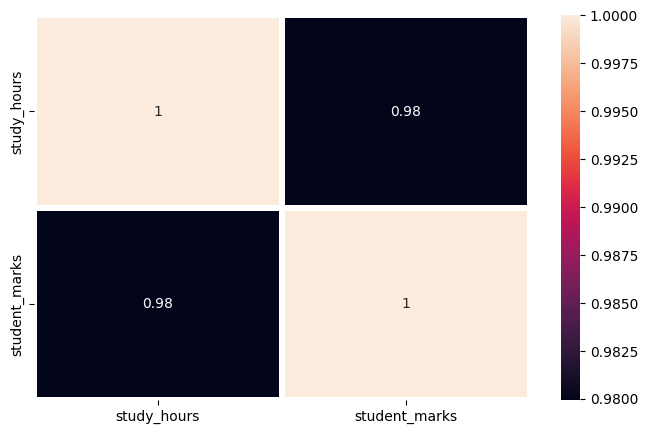

In [20]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,linewidths=3)
plt.show()

In [22]:
X=df.drop("student_marks",axis="columns")
y=df.drop("study_hours",axis="columns")
print("shape of X =",X.shape)
print("shape of y =",y.shape)


shape of X = (200, 1)
shape of y = (200, 1)


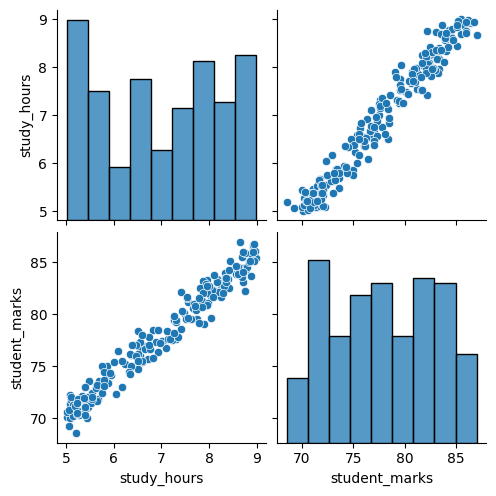

In [23]:
sns.pairplot(df)

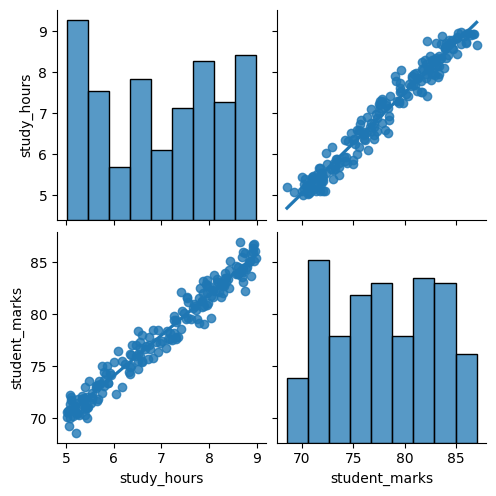

In [25]:
sns.pairplot(df,kind="reg")

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=51) # taking 20% data for test. 20% is randomly
print("shape of X_train =",X_train.shape)
print("shape of y_train =",y_train.shape)
print("shape of X_test =",X_test.shape)
print("shape of y_test =",y_test.shape)


shape of X_train = (160, 1)
shape of y_train = (160, 1)
shape of X_test = (40, 1)
shape of y_test = (40, 1)


In [30]:
from sklearn.impute import SimpleImputer

# Impute missing values in X_train
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Initialize and train the linear regression model
lr = LinearRegression()
lr.fit(X_train_imputed, y_train)


LinearRegression()

In [31]:
lr.coef_

array([[3.93542701]])

In [32]:
lr.intercept_

array([50.44755341])

In [33]:
m = lr.coef_
c = lr.intercept_
y =m*5 + c
y

array([[70.12468844]])

In [35]:
# Impute missing values in X_test using the same imputer
X_test_imputed = imputer.transform(X_test)

# Predict using the trained linear regression model
y_pred = lr.predict(X_test_imputed)


In [36]:
pd.DataFrame(np.c_[X_test,y_test,y_pred],columns=["study_hours","student_marks_original Percentage","student_marks_predicted Percentage"])


,study_hours,student_marks_original Percentage,student_marks_predicted Percentage
0,8.30,82.02,83.111598
1,7.23,77.55,78.900691
2,8.67,84.19,84.567706
3,8.99,85.46,85.827042
4,8.71,84.03,84.725123
5,7.70,80.81,80.750341
6,5.69,73.61,72.840133
7,5.39,70.90,71.659505
8,5.79,73.14,73.233676
9,5.39,73.02,71.659505


In [39]:
# Impute missing values in X_test using the same imputer
X_test_imputed = imputer.transform(X_test)

# Evaluate the performance of the model on the test data
score = lr.score(X_test_imputed, y_test)
print("Model Score on Test Data:", score)


Model Score on Test Data: 0.9511550531044873
